<a href="https://colab.research.google.com/github/makadnan/EDA_project/blob/main/Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 
**EDA on the data of Play Store Apps**


##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

This project aims to explore the Play Store dataset, consisting of information about more than 10,000 mobile apps. The project focuses on understanding the characteristics and trends of popular apps in terms of their categories, ratings, installs, prices, and user reviews.

The analysis reveals that the most popular app categories are Family, Game, and Tools. The ratings of the apps are generally high, with most apps having a rating of 4 or above. However, there is some variation in ratings across different categories, with some categories having a higher average rating than others.

The analysis also shows that there is a positive relationship between the number of installs and app ratings, suggesting that users are more likely to rate and review apps that they find useful. In addition, there is no clear correlation between app size and rating, but there is a weak positive correlation between app price and rating.

Furthermore, the analysis compares the sentiment of user reviews for free and paid apps and finds that users generally have a more positive sentiment towards paid apps. However, it also reveals that the majority of users prefer free apps over paid apps, indicating that price is an important factor in app selection.

Overall, this project provides valuable insights into the characteristics and trends of popular apps in the Play Store, which can be useful for developers and marketers to make data-driven decisions for app development and promotion.

# **GitHub Link -**
https://github.com/makadnan/EDA_project/blob/5e9260567d87225dd1715c9bd8bdcf23b518920d/Play_Store_App_Review_Analysis.ipynb

# **Problem Statement**


**We will try to gain insights into the characteristics of Google Play Store App Reviews data through EDA(Exploratory Data Ananlysis).** 

To get an idea and further guidance for the analysis, will try to answer the following questions.

What are the most popular app categories in the store?

What is the distribution of app ratings and how do they vary across categories?

What is the relationship between the number of installs and app ratings?

Are there any correlations between app size, price, and rating?

Do paid apps have better reviews than free apps?

Do users always prefer free apps over paid apps?

#### **Business Objective**

The business objective of conducting EDA on Google Play Store app review analysis is to gain insights into the user feedback for various apps available on the Google Play Store. By analyzing the app reviews, businesses can understand the strengths and weaknesses of their own apps as well as those of their competitors. This analysis can help businesses to improve their apps, identify new opportunities, and make data-driven decisions to enhance the user experience and increase customer satisfaction. 

Additionally, it can also help businesses to identify any emerging trends in user behavior or preferences and adapt their app development strategies accordingly.

Also, to identify trends and patterns in the types of apps that are popular on the Google Play Store, in order to inform app developers' decision-making around app development and marketing.

We can  compare the performance of paid vs. free apps too, in order to inform app developers' decisions around monetization and pricing strategies

# ***Let's Begin !***

## ***1. Knowing The Data***

### Import Libraries

In [1]:
#importing imporant libraries
import pandas as pd               # for data manipulation and analysis
import numpy as np                # for numerical operations
import matplotlib.pyplot as plt   # for data visualization
import seaborn as sns             # for statistical data visualization

### Dataset Loading

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone_project/EDA/Play Store Data.csv')

### Dataset First View

In [4]:
# Dataset First Look
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count

total_rows, total_columns = df.shape

print(f'The dataset has {total_rows} rows and {total_columns} columns')

The dataset has 10841 rows and 13 columns


### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
num_duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 483


#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
null_columns = df.isnull().sum()
null_columns

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

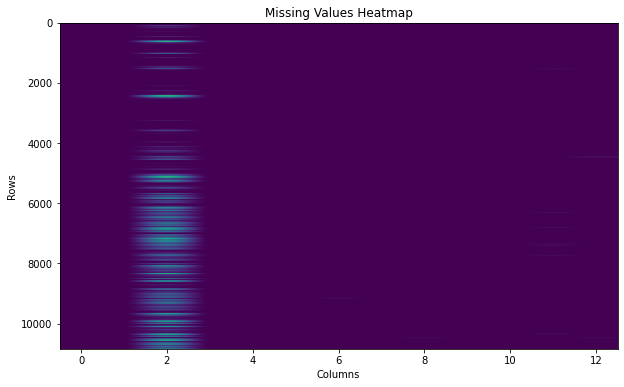

In [9]:
# Visualizing the missing values

# Create a boolean mask for missing values
mask = df.isna()

# Create a heatmap of the missing values
plt.figure(figsize=(10, 6))
plt.title('Missing Values Heatmap')
plt.imshow(mask, cmap='viridis', aspect='auto')
plt.xlabel('Columns')
plt.ylabel('Rows')
plt.show()


### What did you know about your dataset?

Our dataset has 13 columns and 10841 rows. The data info tells us that some columns are have missing values but mostly in rating column while there are 483 rows with duplicate vlues. The Rating column has a float data type, while all other columns have an object (string) data type. 

## ***2. Understanding Columns***

In [10]:
# Dataset Columns
column_names= df.columns
print(column_names)

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [11]:
# Dataset Describe
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


### Columns Description 

The Size, Installs, and Price columns are expected to be numeric, but they are currently stored as strings. We may need to convert these columns to numeric data types later on for analysis.

### Checking Unique Values for each column.

In [12]:
# Check Unique Values for each variable.
for column in df.columns:
    total_unique= df[column].nunique()
    unique_values = df[column].unique()
    print(f"Total unique values in {column} is {total_unique} and the values are:\n {unique_values}")
    print()

Total unique values in App is 9660 and the values are:
 ['Photo Editor & Candy Camera & Grid & ScrapBook' 'Coloring book moana'
 'U Launcher Lite – FREE Live Cool Themes, Hide Apps' ...
 'Parkinson Exercices FR' 'The SCP Foundation DB fr nn5n'
 'iHoroscope - 2018 Daily Horoscope & Astrology']

Total unique values in Category is 34 and the values are:
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

Total unique values in Rating is 40 and the values are:
 [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3. 

## 3. ***Data Wrangling***

Before starting Data Wrangling, will first  make a copy of our dataset.

In [13]:
df_copy=df.copy()

### Data Wrangling Code

We will start our data wrangling with handling duplicate values

In [14]:
#checking the duplicates
duplicates = df[df.duplicated(keep=False)]
duplicates.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
164,Ebook Reader,BOOKS_AND_REFERENCE,4.1,85842,37M,"5,000,000+",Free,0,Everyone,Books & Reference,"June 25, 2018",5.0.6,4.0 and up
192,Docs To Go™ Free Office Suite,BUSINESS,4.1,217730,Varies with device,"50,000,000+",Free,0,Everyone,Business,"April 2, 2018",Varies with device,Varies with device
193,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
204,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
213,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up


The above code returns a DataFrame that contains all rows that are duplicates. The 'keep=False' argument is used to indicate that all duplicate rows should be included in the result. If we used "keep='first'" instead, it would only include the first occurrence of each duplicate row.

In [15]:
# checking the sample of duplicate rows
duplicates = df.duplicated(keep=False)
duplicate_rows = df[duplicates].sort_values(by=list(df.columns))
duplicate_rows

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2256,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3085,"theScore: Live Sports Scores, News, Stats & Vi...",SPORTS,4.4,133833,34M,"10,000,000+",Free,0,Everyone 10+,Sports,"July 25, 2018",6.17.2,4.4 and up
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device


The above code ensures that duplicates are placed adjacent to each other.The 'by' parameter specifies the columns based on which the sorting is to be done. In this case, list(df.columns) returns a list of all the column names of the DataFrame. Therefore, the sort_values() method sorts the DataFrame rows based on all the columns in the DataFrame in alphabetical order.

In [16]:
#dropping the duplicat rows in the copy of the dataframe
df_copy = df_copy.drop_duplicates()

In [17]:
# checking the number of duplicate rows in the copy
num_duplicates = df_copy.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


Now, will try to handle missing values and will repalce them with appropriate values.

In [18]:
#names of columns with null values and the number of null values in each column
null_columns = df_copy.isnull().sum()
for column in null_columns.index:
    if null_columns[column] > 0:
        print(column, null_columns[column])

Rating 1465
Type 1
Content Rating 1
Current Ver 8
Android Ver 3


In [19]:
# replace missing values in categorical columns with mode
df_copy['Type'].fillna(df_copy['Type'].mode()[0], inplace=True)
df_copy['Content Rating'].fillna(df_copy['Content Rating'].mode()[0], inplace=True)
df_copy['Current Ver'].fillna(df_copy['Current Ver'].mode()[0], inplace=True)
df_copy['Android Ver'].fillna(df_copy['Android Ver'].mode()[0], inplace=True)

/usr/local/lib/python3.9/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
# replacing null values of Rating with its mean
mean_rating = df_copy['Rating'].mean()
df_copy['Rating'] = df_copy['Rating'].fillna(mean_rating)

In [21]:
#checking total null values
df_copy.isnull().sum().sum()

0

**Summary Statistics**

In [22]:
df_copy.describe()

,Rating
count,10358.000000
mean,4.189542
std,0.505405
min,1.000000
25%,4.100000
50%,4.200000
75%,4.500000
max,19.000000


The above descriptions of the summary statistics states that we have only one numeric column i.e. 'Rating' and its minimum value is 1 and maximum value is 19. But as we all know, ratings are given between 0 and 5 and therefore max value is certainly an outlier and most probably a wrong entry. So, we need to further investigate this. Later, will try to convert categorical columns like reviews,size, installs and price to numeric columns as their values are numeric in nature.

In [23]:
#Rating greater than 5
rating_outliers = (df_copy['Rating'] >5).sum()
print(f"Number of outliers: {rating_outliers}")

Number of outliers: 1


In [24]:
#only one outlier indicates that it is the max value of the column.
max_rating = df_copy['Rating'].max()
outliers = df_copy[df_copy['Rating'] == max_rating]
outliers

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


The above row says that max value is actually not an outlier but a wrong entry done and it was supposed to be 1.9 and values have to shifted by one column to make it correct entry.

In [25]:
#checking values of the row using loc method
df_copy.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                   Everyone
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                    4.1 and up
Name: 10472, dtype: object

In [26]:
#shifting each value by one column
df_copy.loc[10472] = df_copy.loc[10472].shift(periods=1)

In [27]:
df_copy.loc[10472]

App                                                   NaN
Category          Life Made WI-Fi Touchscreen Photo Frame
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                           Everyone
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

Shifting of values from Rating column has been done successfully. But App is having null value now and App's value got shifted to Category. So, wil try to exchange the values of App and Category and later will replace the null value will the mode of the category column.

In [28]:
#exchange of values
df_copy.loc[10472, ['App', 'Category']] = df_copy.loc[10472, ['Category', 'App']].values
df_copy.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                              19.0
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                           Everyone
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [29]:
#replacing null values of the Category column with its mode
mode_of_category=df_copy['Category'].mode().values[0]
df_copy['Category'].fillna(mode_of_category, inplace=True)

In [30]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   App             10358 non-null  object
 1   Category        10358 non-null  object
 2   Rating          10358 non-null  object
 3   Reviews         10358 non-null  object
 4   Size            10358 non-null  object
 5   Installs        10358 non-null  object
 6   Type            10358 non-null  object
 7   Price           10358 non-null  object
 8   Content Rating  10358 non-null  object
 9   Genres          10358 non-null  object
 10  Last Updated    10358 non-null  object
 11  Current Ver     10358 non-null  object
 12  Android Ver     10358 non-null  object
dtypes: object(13)
memory usage: 1.4+ MB


The above info shows even Rating column as an object type instead of float type. Now, will convert Rating, Reviews, Size, Installs and Price to flaot types.

In [31]:
#converting rating column to float type
df_copy['Rating'] = df_copy['Rating'].astype(float)

In [32]:
#converting reviews column to float type
df_copy['Reviews'] = df_copy['Reviews'].astype(float)

If we see the unique values of installls column, all the values are in string with '+' and ',' signs. So, we first need to replace the signs and then convert them to numeric values.

In [33]:
# replacing '+' sign with ''
df_copy['Installs'] = df_copy['Installs'].str.replace('+', '')

<ipython-input-33-08946f29ff76>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_copy['Installs'] = df_copy['Installs'].str.replace('+', '')


In [34]:
#replacing ',' sign with ''
df_copy['Installs'] = df_copy['Installs'].str.replace(',', '')

In [35]:
#converting installs column to float type
df_copy['Installs']=df_copy['Installs'].astype(float)

The values in the Price column are  with '$' signs. We will remove dollar signs and convert the string to numeric values.

In [36]:
# replacing '$' with ''
df_copy['Price'] = df_copy['Price'].str.replace('$', '')

<ipython-input-36-be2612f4d24f>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_copy['Price'] = df_copy['Price'].str.replace('$', '')


In [37]:
#converting price column to float type
df_copy['Price']=df_copy['Price'].astype(float)

The size column has has numerical data but with certain suffixes like 'k' and 'M' for kb and mb respectively and thereby making it string object type.To make it a numerical column, we need to first remove letters 'M' and 'k'. Later, will remove 'Varies with device' with the mode of the column.

In [38]:
df_copy['Size'] = df_copy.Size.replace("Varies with device",np.nan) #now replacing it witn null.
df_copy['Size'] = df_copy.Size.str.replace("M","000") # All size values became the kilobyte type.
df_copy['Size'] = df_copy.Size.str.replace("k","") #Just removing 'k' letter to make it only numeric value in kb
df_copy['Size'] =df_copy['Size'].astype(float) #converting the entire string to float
df_copy['Size']=df_copy['Size']/1000 # converting kb to mb
df_copy['Size'].dtype

dtype('float64')

In [39]:
#replacing null values of the column with its mode
mode_of_size=df_copy['Size'].mode()[0]
df_copy['Size']=df_copy['Size'].fillna(mode_of_size)

### Manipulations done and insights found

Altogether, we could have removed the rows with missing values using df.dropna(). But,this could be a good option for a large dataset and the null values are few. Also, we would have lost some information, and it might not be the best option if the missing values are concentrated in certain columns.

Therefore, it becomes important to choose the appropriate strategy for handling missing values based on the nature of our data and the objectives of our analysis.


So, we replaced the missing values with a fixed value, such as mode for the categorical columns and mean for numerical columns. We used df.fillna() to do this.

And, the numeric columns Rating, Reviews, Size, Installs and Price have all been converted to float type from object type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
**Boxplots**

Before visualizing the charts of our columns, will first check the information and the description of the dataset.

In [40]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          10358 non-null  float64
 3   Reviews         10358 non-null  float64
 4   Size            10358 non-null  float64
 5   Installs        10358 non-null  float64
 6   Type            10358 non-null  object 
 7   Price           10358 non-null  float64
 8   Content Rating  10358 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10358 non-null  object 
 12  Android Ver     10358 non-null  object 
dtypes: float64(5), object(8)
memory usage: 1.4+ MB


Now, the dataset is clean without duplicates and missing values and certains columns have been successfully converted to appropriate d types. Now, will check the description of our dataset and see what does it say.

In [41]:
df_copy.describe()

,Rating,Reviews,Size,Installs,Price
count,10358.000000,1.035800e+04,10358.000000,1.035800e+04,10358.000000
mean,4.187891,4.058654e+05,18.094201,1.415639e+07,1.030701
std,0.484519,2.696651e+06,22.354407,8.023580e+07,16.277843
min,1.000000,0.000000e+00,0.001000,0.000000e+00,0.000000
25%,4.100000,3.200000e+01,0.006525,1.000000e+03,0.000000
50%,4.200000,1.678500e+03,11.000000,1.000000e+05,0.000000
75%,4.500000,4.640425e+04,26.000000,1.000000e+06,0.000000
max,5.000000,7.815831e+07,100.000000,1.000000e+09,400.000000


This is a summary of the basic statistics of the five numerical columns in the dataset:

Rating: The mean rating of the apps is 4.19 with a standard deviation of 0.48. The ratings range from 1 to 5.

Reviews: The mean number of reviews is 405,865 with a standard deviation of 2,696,651. The minimum number of reviews is 0, while the maximum is 78,158,310.

Size:The mean of size is 18.09MB with s standard deviation of 22.35. The minimum size is 0.001 MB, and while the maximum size is 100 MB.

Installs: The mean number of installs is 14,156,390 with a standard deviation of 80,235,800. The minimum number of installs is 0, while the maximum is 1,000,000,000.

Price: The mean price of the apps is 1.03 with a standard deviation of 16.28. The minimum price is 0, while the maximum is 400.

This description gives us an idea of the distribution and range of each column, and can be used to make charts and guide further analysis. For example, we can see that the number of reviews, sizes and installs have a large range, while the price is mostly low with a few high outliers.

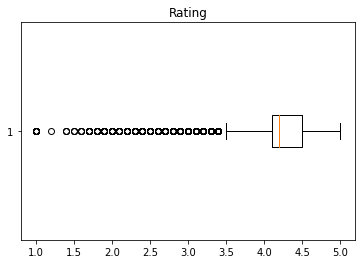

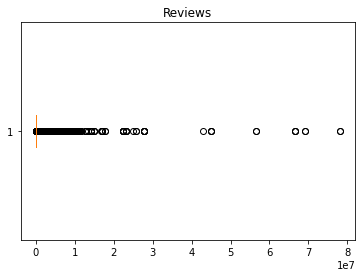

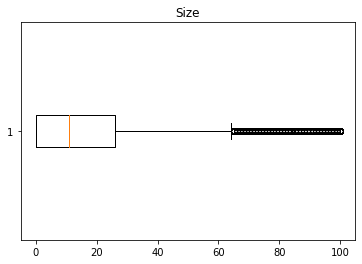

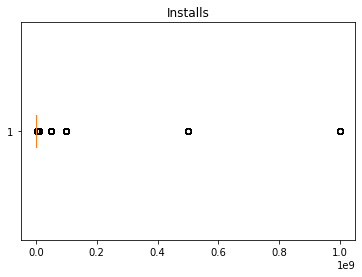

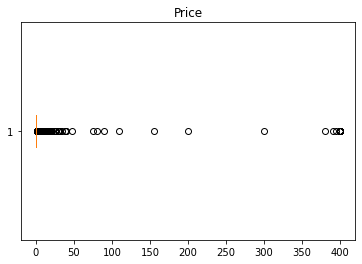

In [42]:
# Chart - 1 visualization code
# Boxplots to check outliers
num_columns = df_copy.select_dtypes(include=['float64']) #box plots for numerical columns
for column in num_columns:
    plt.boxplot(df_copy[column],vert=False)
    plt.title(column)
    plt.show()

##### 1. Reason

To identify potential outliers and visualizing differences between groups, we needed to visually summarize the shape, central tendency, and variability of numerical columns by using box plots. The plot displays a box that represents the interquartile range (IQR), the median (middle value), and the whiskers that extend to the minimum and maximum values that are not outliers.

##### 2. The insight(s) found from the chart

Each box plot represents a numerical column of our dataset, and shows the distribution of the data. The box itself shows the interquartile range (IQR) of the data, with the box edges representing the first and third quartiles, and the line inside the box representing the median.

The whiskers extending from the box represent the range of the data, with any data points outside the whiskers considered outliers. The outliers are represented by individual points on the plot.

Here's a brief explanation of the box plots generated for each column:

The box plot for the Rating column shows a fairly symmetrical distribution of ratings with some outliers on the lower end of the scale.

The box plot for the Reviews column shows a highly skewed distribution, with a large number of apps having a low number of reviews, and a small number of apps having a very large number of reviews. There are also several outliers on the high end of the scale above 75,000,000.

Looking at the boxplot for the 'Size' column, we can see that the distribution is highly skewed to the right with a long tail of outliers. The median and quartile values suggest that most apps have a smaller size, while the outliers show that there are some apps with very large sizes.

The box plot for the Installs column shows a similar distribution to the Reviews column, with a highly skewed distribution and many outliers on the high end of the scale.

The box plot for the Price column shows a very skewed distribution, with most apps being free and a small number of apps having a high price. There are several outliers on the high end of the scale, indicating some apps are priced much higher than the majority of apps in the dataset.

##### 3. Business impact

As of now, we can see in the Size column that there are a significant number of apps with sizes beyond the upper whisker, which indicates that these values may be extreme outliers. This suggests that there may be some data quality issues with the 'Size' column because there are very few apps that are several hundred MB in size. Further investigation may be needed to determine if these values are correct or if they are erroneous.


#### Chart - 2
**Histograms**

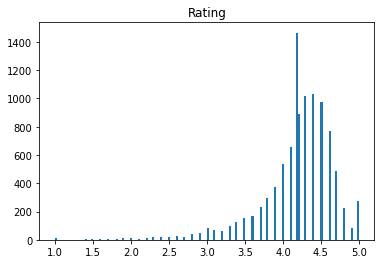

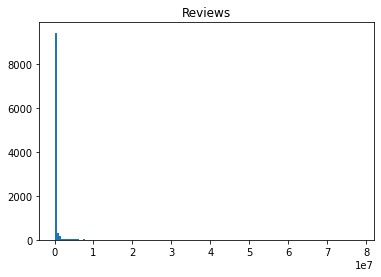

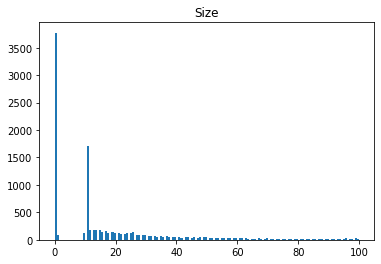

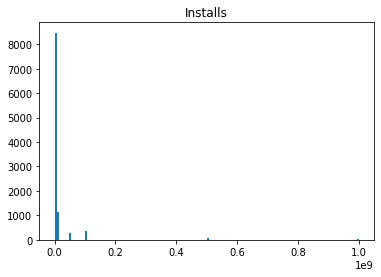

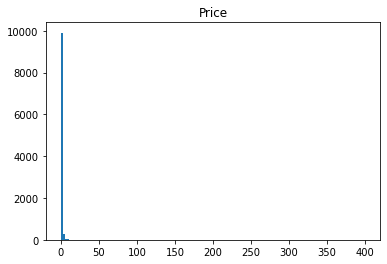

In [43]:
# Chart - 2 visualization code
# Histograms to check distribution of numerical data
for column in num_columns:
    plt.hist(df_copy[column], bins=150)
    plt.title(column)
    plt.show()

##### 1. Reason

Histograms are used to visualize the distribution of numerical data. They show the frequency of values in a dataset by binning the data into intervals and plotting the count of values that fall into each interval.

##### 2. Insight(s) found from the chart

The "Rating" histogram is roughly bell-shaped, with the majority of the ratings between 4.0 and 4.5 while the mean is 4.19. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.

The "Reviews" histogram is right-skewed, meaning that there are more apps with lower numbers of reviews and fewer apps with very high numbers of reviews.

The "Size" histogram showed that the size of most of the apps was below 50MB, with a few larger apps.

The "Installs" histogram is also right-skewed, indicating that there are more apps with lower numbers of installs and fewer apps with very high numbers of installs.

The "Price" histogram is also right-skewed, with most apps priced at 0 (i.e. free) and a smaller number of apps priced higher.

##### 3. Business impact

People tend install free apps more and most of the installed apps are having size below 50 Mb.

#### Chart - 3
**Scatter PLots**

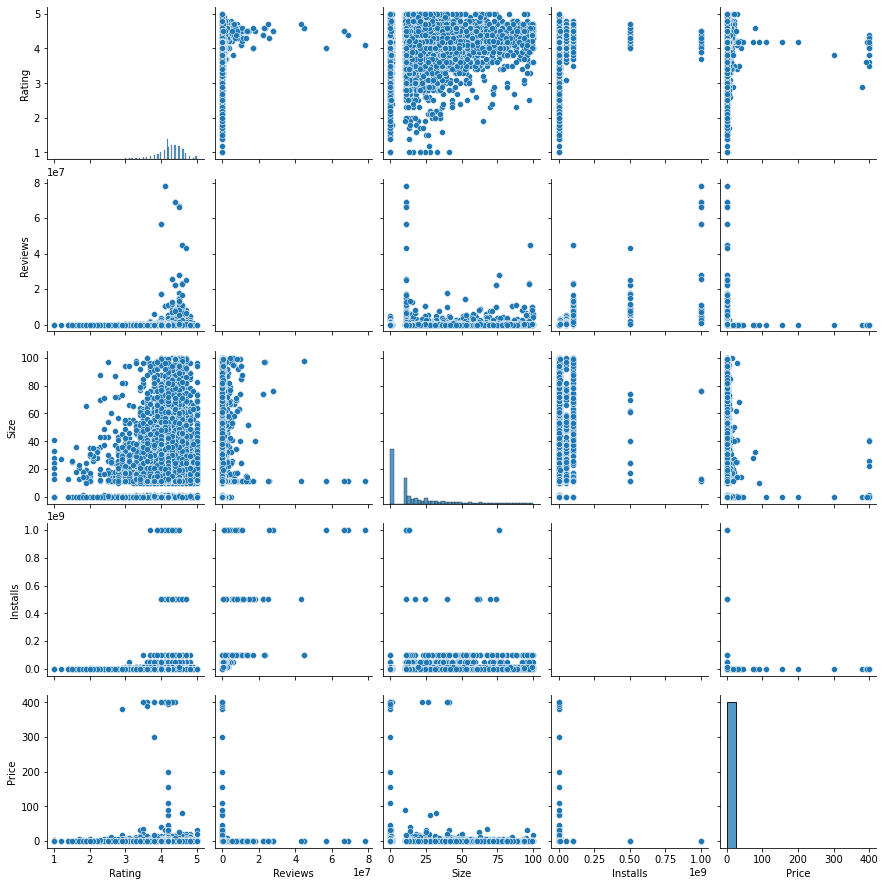

In [44]:
# Chart - 3 visualization code
# Scatter plots to visualize the relationships between each numerical column to every other numerical columns.
sns.pairplot(num_columns)

##### 1. Reason

Scatter plot is used to visualize the relationship between two numerical columns. It helps to identify if there is any correlation between them, the strength of the correlation, and the direction of the relationship (positive or negative).

##### 2. Insight(s) found from the chart

**Reviews and Installs** show a strong positive relationship, indicating that as the number of installs increases, the number of reviews also increase.

**Rating and Installs**  show a slightly positive relationship, indicating that as the number of installs increase, the ratings tend to be higher.

**Rating and Reviews** columns have no obvious correlation between them. The data points are scattered and there is no clear linear trend as the number of reviews increases, the ratings are distributed widely and not necessarily higher. 

**Rating and Size** columns also have no obvious correlation between them. The data points are scattered and there is no clear linear trend.

**Price and Rating** columns have slightly positive correlation between the . As the price of the app increases, the ratings tend to be slightly higher. However, the data points are scattered and there is no clear linear trend. 

**Price and Reviews**columns also do not show correlation between them. 

**Reviews and Price** show the price of the apps doesn't depend much on the number of reviews.

**Price and Size**columns have no obvious correlation between them. The data points are scattered and there is no clear linear trend.

**Installs and Price** finally show that most of the apps with higher prices have lower installations.

##### 3. Business impact

There are more reviews for particular range of rating. Also, the majority of the apps with higher prices have ratings in the range of 4 to 5 but few installations.

#### Chart - 4
**Correlation Heatmap**

<AxesSubplot:>

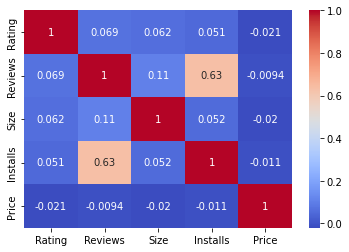

In [45]:
# Chart - 4 visualization code
#Heat Map
corr_matrix = num_columns.corr() #correaltional matrix between numerical columns 
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

##### 1. Reason

We check correlations between columns to understand the strength and direction of the relationship between them. Correlation analysis helps to identify which columnss are positively or negatively related to each other, and how strong or weak the relationship is. In exploratory data analysis (EDA), this information can be used to visualize the relationships between different columns, which can be useful in understanding the data and identifying patterns.

Heatmap  is used to show the correlation matrix among the numerical columns in our data.The values in the cells of the heatmap represent the correlation coefficients. A value of 1 indicates a perfect positive correlation, while a value of -1 indicates a perfect negative correlation. A value of 0 indicates no correlation.

##### 2. The insight(s) found from the chart

Looking at heatmap, we can see that the highest correlation coefficient is between 'Reviews' and 'Installs', with a value of 0.635. This indicates a moderate positive correlation between the number of reviews and the number of installs of an app.

There is a positive correlation between ratings and reviews, although the correlation coefficient (0.068) is not very strong. This means that apps with higher ratings tend to have more reviews, but there are many exceptions to this trend.

The correlation between ratings and installs is positive but weak (0.050).

The Size column has a positive but weak correlation with the Reviews and Installs columns, with correlation coefficients of 0.106811 and 0.051761, respectively. It has a weak correlation with the Rating column as well with a correlation coefficient of 0.061696. However, there seems to be no significant correlation between the Size column and the Price column, as the correlation coefficient is very close to zero (-0.020482).

The correlation between price and the other columnss is weak or negative. There is a weak negative correlation between price and ratings, which suggests that higher priced apps tend to have slightly lower ratings. 

There is also a weak negative correlation between price and installs, which means that higher priced apps tend to have slightly fewer installs.
However, these correlations are not very strong, so the effect of price on ratings and installs may not be very significant.

##### 3. Business impact

Apps with more reviews tend to have more installs, which is expected as more popular apps are likely to attract more reviews.

#### Chart - 5
**Bar Graphs**

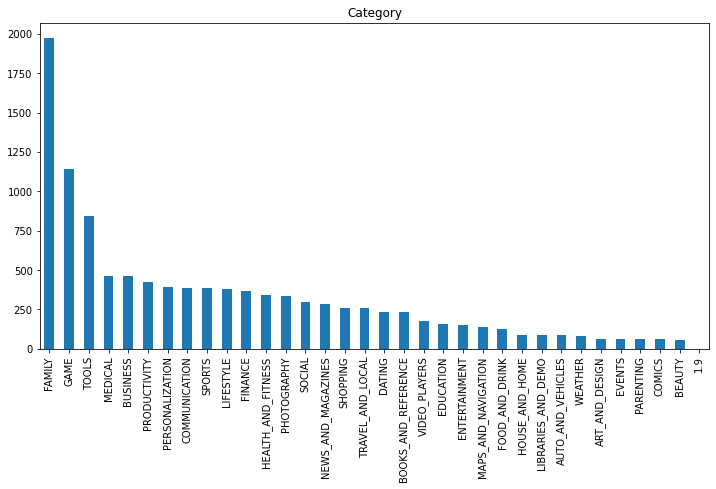

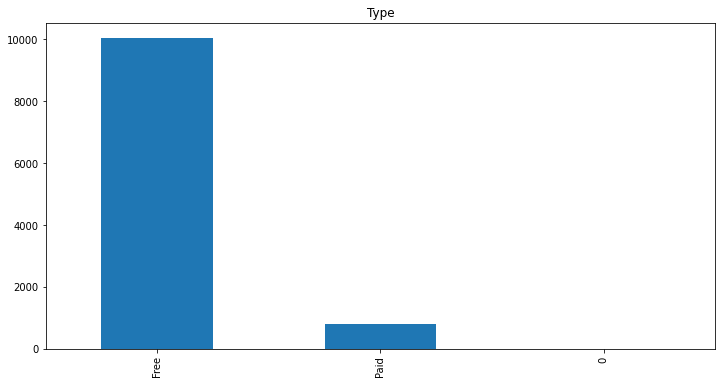

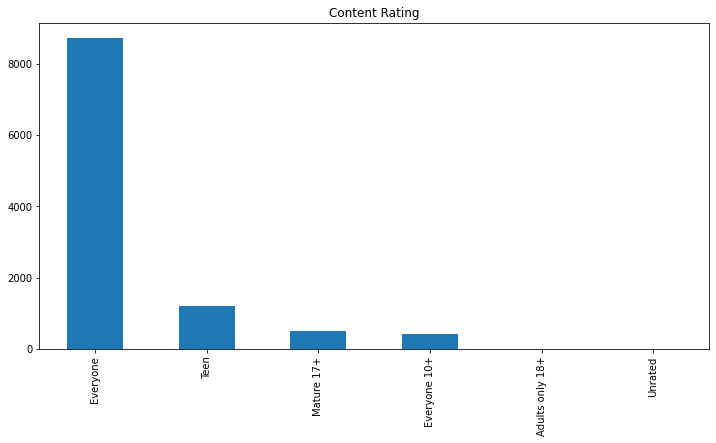

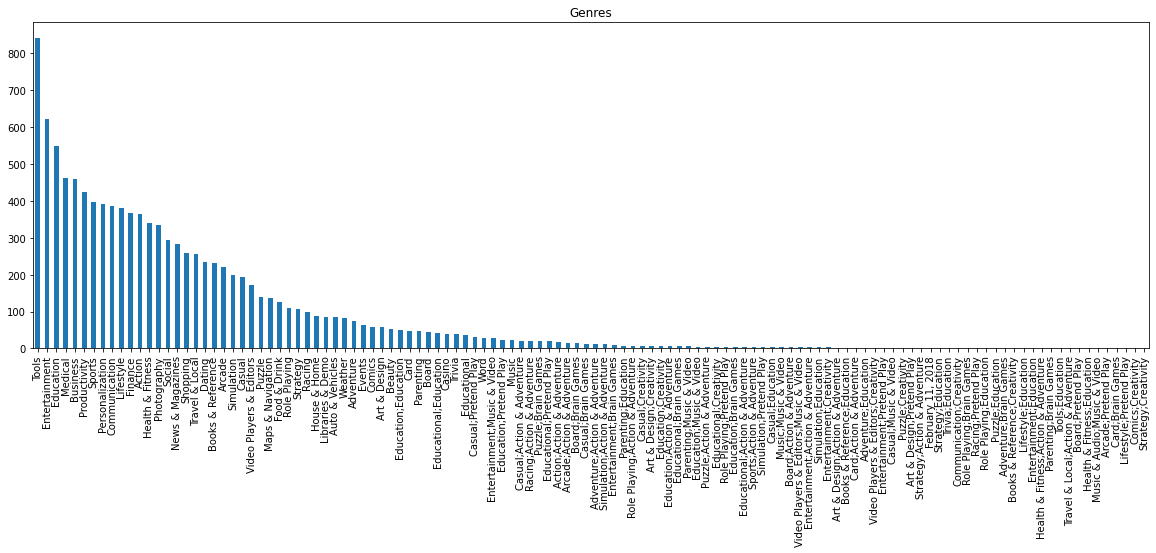

In [46]:
# Chart - 5 visualization code
# list of columns to create bar graphs for
cat_columns = ['Category', 'Type', 'Content Rating', 'Genres']
# loop through the columns and create bar graphs
for column in cat_columns:
  if column=='Genres':
    plt.figure(figsize=(20,6)) #Generes has large number unique values so we need larger graph
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()
  else:
    plt.figure(figsize=(12,6))
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

##### 1. Reason

Bar Graphs are used for visualizaing categorical columns across a range of values through graphs using rectangular bars.

##### 2. The insight(s) found from the chart

Based on the bar graphs in our colab notebook, we can make the following observations:

Category: The most common category of apps is "Family", followed by "Game" and "Tools".

Type: The majority of apps are free, while only a small percentage are paid.

Content Rating: The majority of apps are rated "Everyone", followed by "Teen" and "Mature 17+".

Genres: The most common genres are "Tools", "Entertainment", and "Education".

##### 3. Business impact

These observations can provide insights into the distribution of apps in the Google Play Store and can help in making informed decisions about app development and marketing

#### Chart - 6
**Joint Plots**

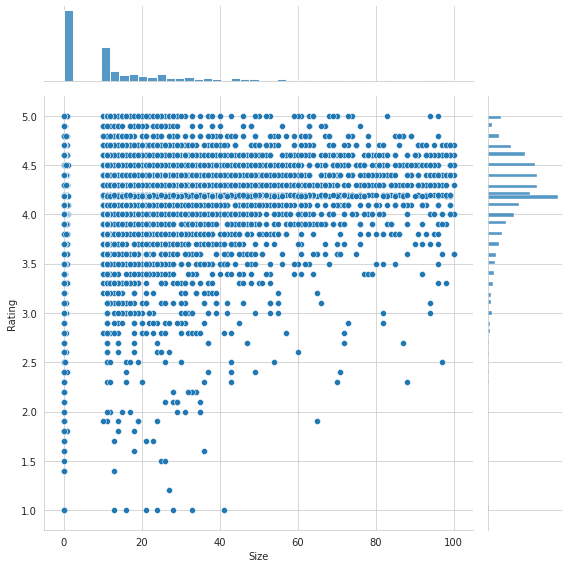

In [47]:
# Chart - 6 visualization code
# jointplot Size vs Rating
sns.set_style('whitegrid')
sns.jointplot(x='Size', y='Rating', data=df_copy, height=8)


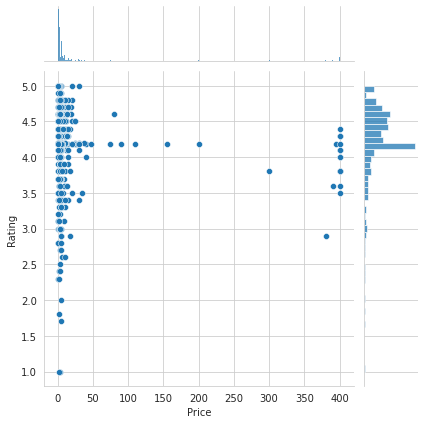

In [48]:
#joint plot Paid Apps vs Rating
paid_apps = df_copy[df_copy['Type'] == 'Paid']

sns.jointplot(x='Price', y='Rating', data=paid_apps)


##### 1. Reason

Joint plots are used to visualize the relationship between two columns, typically a pair of numerical columns. It combines two different plots in one figure: a scatter plot that shows the joint distribution of the values of two columns and two univariate plots that show the distribution of each column separately. The joint plot allows us to see how the columns are related to each other, as well as their individual distributions. This can be useful for exploring the relationship between columns, identifying patterns and insights into patterns or trends in our data that may not be immediately apparent from just looking at the numbers.

##### 2. The insight(s) found from the chart

Based on the jointplot of size and rating, we can observe that:

There is a slight positive correlation between app size and app rating, as we can see a slight trend upwards and to the right in the plot. This means that larger apps tend to have slightly higher ratings compared to smaller apps.
The majority of apps in the dataset are small in size (less than 50 MB) and have ratings between 3.5 and 4.5. However, we can see that there are some apps that are large in size (greater than 100 MB) and have high ratings of 4.5 and above.We can see that both size and rating are approximately normally distributed, with some skewness towards larger sizes and higher ratings.

The jointplot of price of paid apps and rating shows the distribution of the rating and price columns for the subset of the dataset where the Type column equals 'Paid'.
From the plot, we can see that most of the paid apps have a rating of 4 or higher, and there is a wide range of prices for apps with high ratings. We can also see that there are a few outliers with high prices and high ratings



##### 3. Business impact 

There is some relationship between app size and app rating, but it is not a strong or definitive relationship. The size of the app is only one of many factors that may contribute to the overall rating.
However,The jointplot between the price of paid apps and their rating suggests that there is not a clear correlation between these two variables. The plot shows a scattered distribution of points, indicating that the price does not have a significant impact on the rating of the paid apps. This could mean that users are willing to pay more for apps with a high rating, or that price is not a significant factor in the users' decision to rate an app highly. 

#### Chart - 7
**Strip Plots**

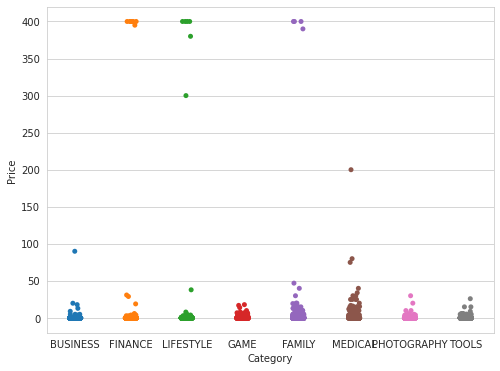

In [49]:
# Chart - 7 visualization code
#strip plot for popular app categories vs price
fig, ax = plt.subplots() # initialized a figure object fig and axes object ax.
fig.set_size_inches(8, 6)
popular_app_cats = df_copy[df_copy.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]
sns.stripplot(x=popular_app_cats['Category'], y=popular_app_cats['Price'], data=df)
plt.show()

The above strip plot chart shows the some of the categories are having very expensive apps. So, we need to further investigate what are those expensive apps really are.

In [50]:
# Apps whose Price is greater than 200
apps_above_200 = popular_app_cats[popular_app_cats.Price > 200]
apps_above_200[['Category', 'App', 'Price']]

,Category,App,Price
4197,FAMILY,most expensive app (H),399.99
4362,LIFESTYLE,💎 I'm rich,399.99
4367,LIFESTYLE,I'm Rich - Trump Edition,400.00
5351,LIFESTYLE,I am rich,399.99
5354,FAMILY,I am Rich Plus,399.99
5355,LIFESTYLE,I am rich VIP,299.99
5356,FINANCE,I Am Rich Premium,399.99
5357,LIFESTYLE,I am extremely Rich,379.99
5358,FINANCE,I am Rich!,399.99
5359,FINANCE,I am rich(premium),399.99


Now, what we can infer from the above output that some expensive apps are actually are junk apps that don't really have a purpose. Sometimes app developers create apps like above apps 'I Am Rich Premium' or 'most expensive app (H)' to test their app development skills. Some  even do this to scam people who might ccidentally purchase their apps in the store.

So, let's remove these junk apps and check the chart again.

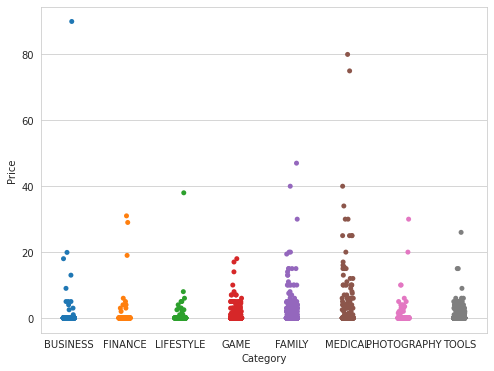

In [51]:
# Select apps priced below $100
#strip plot for popular app categories under the price 100
apps_under_100 = popular_app_cats[popular_app_cats.Price<100]

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = apps_under_100['Category'], y = popular_app_cats['Price'], data = apps_under_100)

##### 1. Reason

Strip plot are used to visualize the distribution of a numerical column against a categorical variable. It is similar to a scatter plot, but with no lines connecting the points. Instead, individual data points are plotted as dots, one for each observation.

The advantage of using a strip plot over a scatter plot is that it can handle larger datasets more efficiently. In a scatter plot, overlapping data points can make it difficult to see the true distribution of the data. With a strip plot, the individual points are more clearly visible and can give a better sense of the distribution of the data.

Additionally, strip plots are particularly useful for categorical data, where the number of unique values is relatively small. In this case, strip plots can provide a clear view of the distribution of the data across the categories.

##### 2. The insight(s) found from the chart

Different categories demand different price ranges. Like the above chart shows that Medical and Family apps are the most expensive ones. Some medical apps extend even up to up to 80 dollars. All game and business apps are priced below 20 dollars. While most of the apps in photography and tools are below 20 dollars but there are some apps that are expensive in these categories as well.

##### 3. Business impact 

The costs of apps are largely based on features, complexity, and platform.
There are many factors to consider when selecting the right pricing strategy for mobile apps. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Like for example, some apps that are simple and are of daily usge like photo editor should free but for a highly-specialized medical app that diagnoses diabetic patients would be expensive inevitably.

#### Chart - 8
**Interactive Box Plot**

In [52]:
# Chart - 8 visualization code
#Interactive Boxplot
import plotly.graph_objs as go #provide a way to create interactive(plotly) graph objects 
import plotly.offline as pyo #allows to create and save Plotly charts offline, without the need for an internet connection.

# Filter the data for paid apps
paid_apps = df_copy[df_copy["Type"] == "Paid"] # filtering the dataframe based on the "Type" column

# Create the trace for paid apps
paid_trace = go.Box(
    y=paid_apps["Installs"],
    name="Paid",
    boxpoints="all",
    jitter=0.3,
    pointpos=-1.8
)

# Filter the data for free apps
free_apps = df_copy[df_copy["Type"] == "Free"]

# Create the trace for free apps
free_trace = go.Box(
    y=free_apps["Installs"],
    name="Free",
    boxpoints="all",
    jitter=0.3, # jitter is used to add random noise or displacement to data points
    pointpos=-1.8 # pointpos controls the position of the points in a box plot
)

# Create the layout 
layout = go.Layout(
    title="Number of Installs of Paid Apps vs. Free Apps",
    yaxis=dict(
        title="Number of Installs (Log Scale)",
        type="log", #A logarithmic scale is used when values spans a large range
        autorange=True # automatically adjusted to fit the range of the data in the plot
    )
)

# Add the traces to the data list
data = [paid_trace, free_trace]

# Create the figure
fig = go.Figure(data=data, layout=layout)

# Show the figure
pyo.iplot(fig)

##### 1. Reason

The interactive box plot is created using the Plotly library in Python which is similar to a traditional box plot that visualizes the distribution of a dataset through five summary statistics: the minimum and maximum values, the lower and upper quartiles, and the median. But, an interactive box plot allows to interact with the chart by hovering over the boxes to see additional information, such as the specific values of each summary statistic and the number of data points within the box.
Also, an interactive box plot can be customized with various design elements, such as color, labels, and titles, to better communicate the insights from the data. 

##### 2. The insight(s) found from the chart

The x-axis represents the type of app (paid or free) and the y-axis represents the number of installs (in millions). The plot also includes a legend that indicates which box corresponds to paid apps and which one corresponds to free apps.
The box plot shows the median (the horizontal line inside the box), the interquartile range (the box), the range of the data (the whiskers), and any outliers (the circles outside the whiskers). The boxes for both paid and free apps are relatively narrow, indicating that most of the data points fall within a relatively narrow range.Additionally, the median number of installs for free apps is higher than for paid apps. The plot also shows that the number of installs for both paid and free apps is highly skewed, with a long tail of outliers.

##### 3. Business impact

The box for free apps is larger than the box for paid apps, indicating that the range of the number of installs for free apps is wider than for paid apps. This suggests that while paid apps may have a more limited audience, they can still be profitable if they are priced appropriately and provide value to their target market.

#### Chart - 9
**Pie Charts**

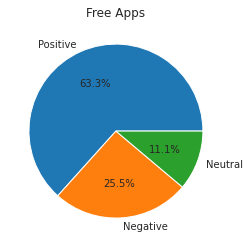

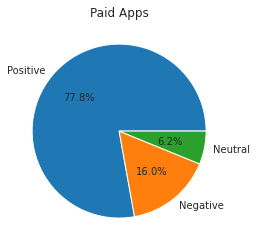

In [53]:
# Load user_reviews.csv
df_reviews = pd.read_csv('/content/drive/MyDrive/Capstone_project/EDA/User Reviews.csv')

# Join the two dataframes
merged_df = merged_df = pd.merge(df_copy, df_reviews,on='App',how='inner')

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Translated_Review'])

# separate dataframes for free and paid apps
free_apps = merged_df[merged_df['Type'] == 'Free']
paid_apps = merged_df[merged_df['Type'] == 'Paid']

# sentiment value counts for free and paid apps
free_sentiment_counts = free_apps['Sentiment'].value_counts()
paid_sentiment_counts = paid_apps['Sentiment'].value_counts()

# create pie chart for free apps sentiment analysis
plt.pie(free_sentiment_counts.values, labels=free_sentiment_counts.index, autopct='%1.1f%%')
plt.title('Free Apps')
plt.show()

# create pie chart for paid apps sentiment analysis
plt.pie(paid_sentiment_counts.values, labels=paid_sentiment_counts.index, autopct='%1.1f%%')
plt.title('Paid Apps')
plt.show()

##### 1. Reason

Pie charts can be used for sentiment analysis when we want to visualize the distribution of sentiments in our dataset. It is useful when there are less sentiment categories like we have only three i.e. positive, negative, and neutral sentiments, making it easy to compare the relative sizes of each sentiment category.

##### 2. The insight(s) found from the chart

We have generated two pie charts for sentiment analysis of free and paid apps separately. The charts show the distribution of sentiment categories (positive, negative, and neutral) for each type of app.

From the charts, we can see that the majority of app reviews in both free and paid categories are positive, with neutral and negative reviews having a smaller share. However, it seems that paid apps have a slightly higher percentage of positive reviews than free apps

##### 3. Business impact

Overall, it highlights the fact that paid apps generally receive more positive reviews compared to free apps.

## **5. Solution to Business Objective**

The number of free apps on the Google Play Store is significantly higher than the number of paid apps and the most popular app categories in the store are 'Family', 'Game', and 'Tools'.The distribution of app ratings is right-skewed, and ratings tend to be higher for some categories such as 'Education' and 'Books & Reference'. But, the paid apps have a slightly higher proportion of positive reviews as compared to the free apps.

There is a positive relationship between the number of installs and app ratings, indicating that more popular apps tend to have higher ratings. So, the apps with higher ratings and positive reviews have a higher number of installs.
Paid apps tend to have slightly higher ratings than free apps, but the difference is not very significant. Although, it certainly means that users do not always prefer free apps over paid apps, as there are some categories where paid apps have higher ratings than free apps. The price of the paid apps on the Google Play Store ranges from 0.99 dollar to 400 dollars, with most of the apps being priced between 1 dollar and 10 dollars.

There is a weak positive correlation between app size and rating, and no significant correlation between price and rating. However, the sentiment analysis of the app reviews shows that the majority of the users have a positive sentiment towards the apps.

Finally, it might be recommended that app developers focus on developing apps in the 'Family', 'Game' and 'Tools' categories, with a user-friendly interface and good ratings, to increase the number of downloads and revenue. The data showed that paid apps generally had better ratings and reviews. This could indicate that users are more willing to spend money on apps that provide value. Developers can focus on providing valuable features and incentives for in-app purchases to increase revenue. Also, it is important to maintain the app quality and respond to the user feedback in a timely manner to improve the user experience and gain more positive reviews.

# **Conclusion**

Overall, it can be concluded that the Google Play Store has a diverse range of apps in various categories, with the most popular categories being Family, Game, and Tools. The ratings of the apps are generally positive, with a majority of them having a rating of 4 or higher. The app size and price do not have a significant impact on the app ratings, but there is a positive correlation between the number of installs and app ratings. Additionally, there is no significant difference between the ratings of paid and free apps. However, users tend to prefer free apps over paid apps, as they have a higher number of downloads. Overall, the analysis provides valuable insights into the Google Play Store, which can be useful for app developers and businesses.

### ***Hurrah! We have successfully completed EDA Capstone Project !!!***